In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

from user_defined_funcs import *

In [2]:
raw_df = load_data()

In [3]:
df_indexed = set_index(raw_df)

In [4]:
df_indexed.head()

,Power_MWH
Datetime,
2010-01-01 00:00:00,31647.0
2010-12-31 01:00:00,29634.0
2010-12-31 02:00:00,28614.0
2010-12-31 03:00:00,28146.0
2010-12-31 04:00:00,28051.0


<Axes: title={'center': 'Power Consumption'}, xlabel='Datetime'>

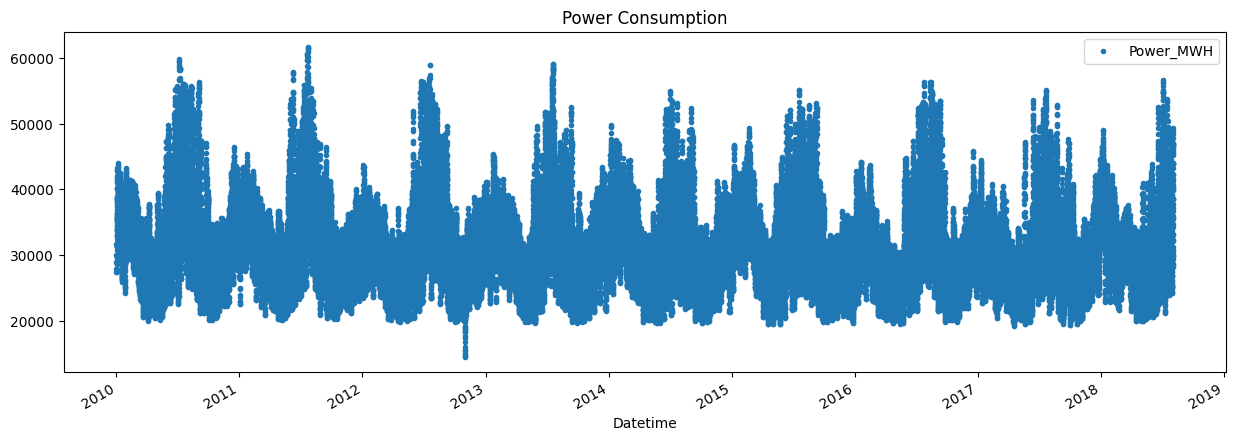

In [5]:
df_indexed.plot(style='.', figsize=(15, 5), title='Power Consumption')

# Feature Creation

In [6]:
df_with_features = create_features(df_indexed)

# Visualize our Feature / Target Relationship

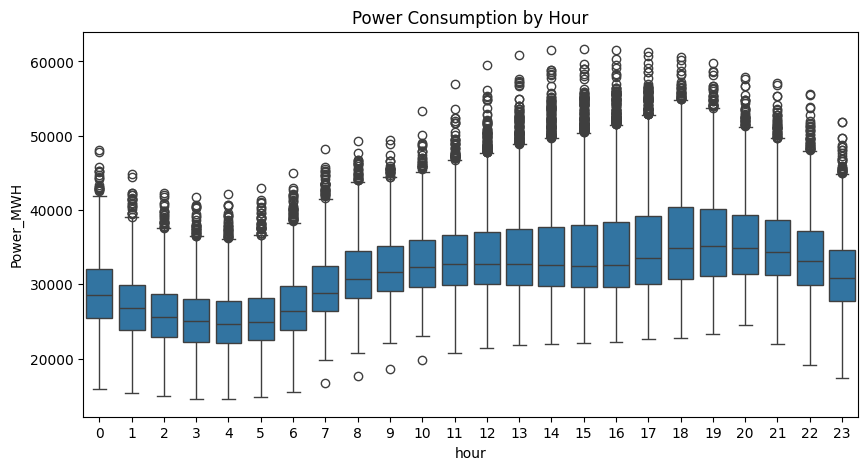

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_features, x='hour', y='Power_MWH')
ax.set_title('Power Consumption by Hour')
plt.show()

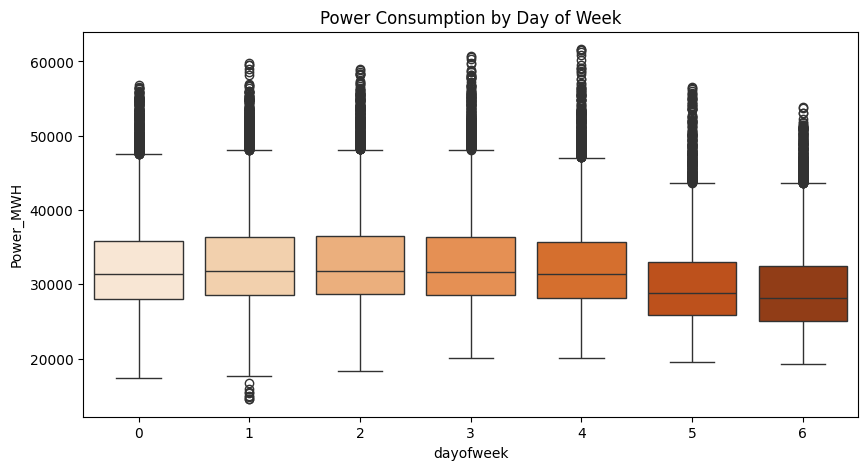

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_features, x='dayofweek', y='Power_MWH', palette='Oranges')
ax.set_title('Power Consumption by Day of Week')
plt.show()

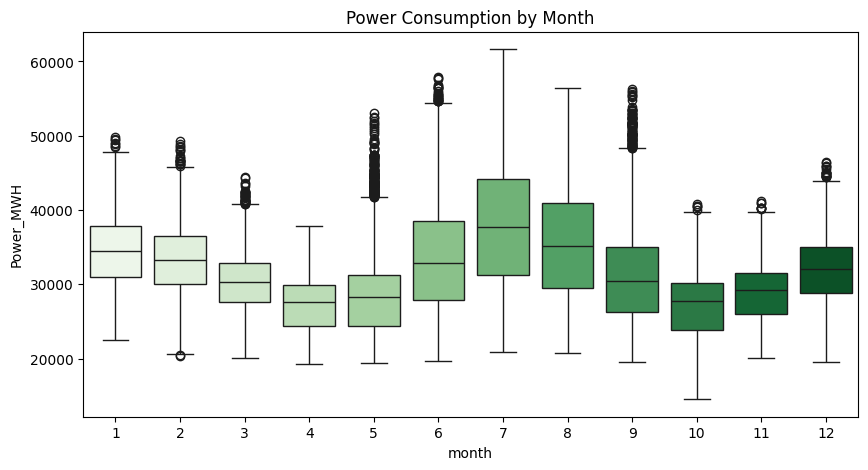

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_features, x='month', y='Power_MWH', palette='Greens')
ax.set_title('Power Consumption by Month')
plt.show()

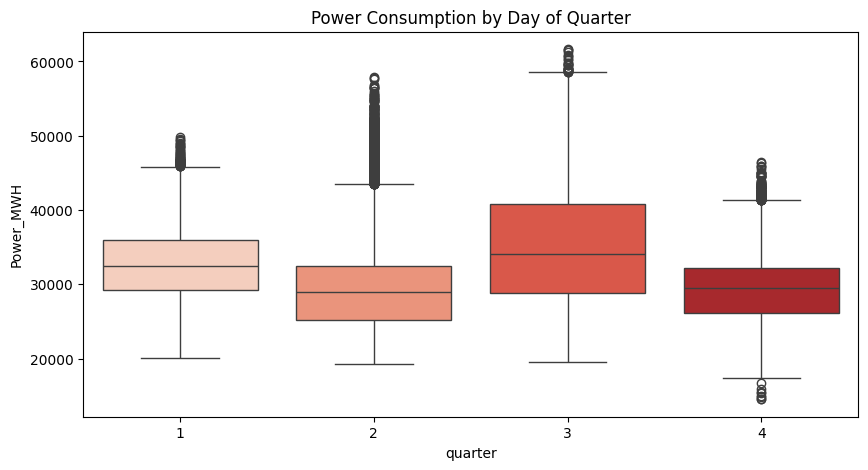

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_features, x='quarter', y='Power_MWH', palette='Reds')
ax.set_title('Power Consumption by Day of Quarter')
plt.show()

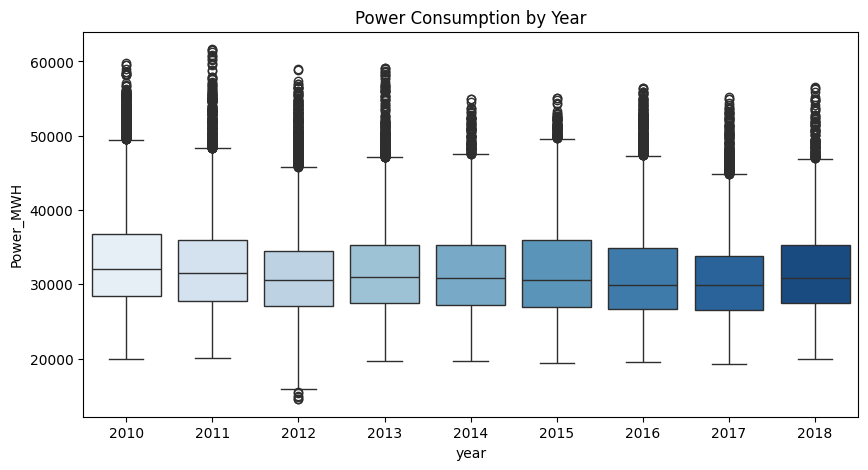

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_with_features, x='year', y='Power_MWH', palette='Blues')
ax.set_title('Power Consumption by Year')
plt.show()

# Train / Test Split

In [12]:
train, test = train_test_split(df_indexed)

In [13]:
train.head()

,Power_MWH
Datetime,
2010-01-01 00:00:00,31647.0
2010-12-31 01:00:00,29634.0
2010-12-31 02:00:00,28614.0
2010-12-31 03:00:00,28146.0
2010-12-31 04:00:00,28051.0


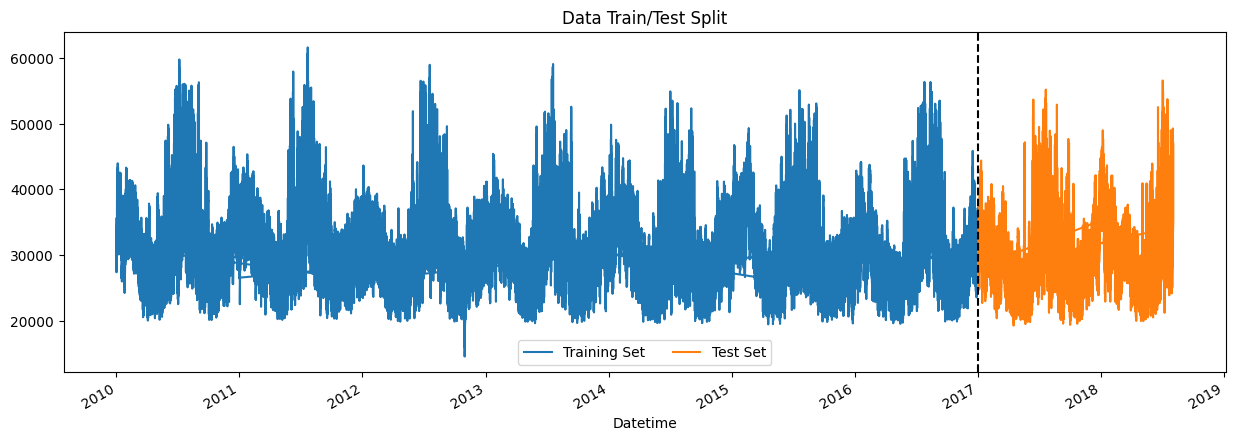

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'], loc='lower center', ncol=2)
plt.show()

# Base Model

In [15]:
train = create_features(train)
test = create_features(test)

In [16]:
train.columns

Index(['Power_MWH', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [17]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'Power_MWH'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [18]:
model = DummyRegressor(strategy='mean')  # Predicts the mean of the target values
model.fit(X_train, y_train)

test['prediction'] = model.predict(X_test)

In [19]:
score = np.sqrt(mean_squared_error(test['Power_MWH'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 6177.72


CREDITS: 
* https://www.kaggle.com/code/robikscube/time-series-forecasting-with-machine-learning-yt
* https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html
